# **Directly Loading CSV File**

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('titanic.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# **Mounting csv to drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/


 Benisha_M_8754278349.docx
 big_bang_theory_episodes.csv
'Colab Notebooks'
'Demo video HDR'
 IMG_20221105_111734.jpg
 IMG_20221106_181458.jpg
'INDEPENDENCE DAY  SPECIAL WHATSAPP STATUS TAMIL _ August 15 whatsapp status tamil(480P).mp4'
 titanic.csv


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/titanic.csv")

print(df.head())

   Unnamed: 0  Survived  Pclass                                          Name  \
0         NaN         0       3                              Kelly, Mr. James   
1       893.0         1       3              Wilkes, Mrs. James (Ellen Needs)   
2       894.0         0       2                     Myles, Mr. Thomas Francis   
3       895.0         0       3                              Wirz, Mr. Albert   
4       896.0         1       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   

      Sex   Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0    male  34.5      0      0   330911   7.8292   NaN        Q  
1  female  47.0      1      0   363272   7.0000   NaN        S  
2    male  62.0      0      0   240276   9.6875   NaN        Q  
3    male  27.0      0      0   315154   8.6625   NaN        S  
4  female  22.0      1      1  3101298  12.2875   NaN        S  


## **Import necessary libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Feature Engineering:** Understanding Data and Dealing with Domain knowledge

**Step 1:** Know about size of data to crosscheck with our capabilities especially in Big data based projects.



In [ ]:
print("Rows, columns:", df.shape)

Rows, columns: (418, 12)


## **2.Handling Missing values:**

**3 ways:**

1.Removing if doesn't contribute much in predicting target or in producing result.

2.Replacing with central tendency(mean/median/mode)

3.Interpolate: Interpolation is the process of estimating missing or unknown values within the range of a dataset, based on known data points.

In [ ]:
# 2.1 Check missing values
print("Missing values per column:")
print(df.isna().sum())

Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
# Check missing values again
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
# Option 1: Fill missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Option 2: Fill missing Fare with mean
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

# Option 3: Drop Cabin column (too many missing values)
df.drop(columns=['Cabin'], inplace=True)

/tmp/ipython-input-94900945.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-94900945.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

# **Why?**

**1.Age → Fill with Median**

In Titanic data, Age has continuous numeric values.

If you fill missing ages with mean (average), outliers (like very old passengers or infants) can distort it.

Median is more robust because it’s the “middle value” and not affected much by extreme ages.

**Domain link:**

Passenger ages were diverse: children, young adults, elderly.

A 60+ year-old or a baby won’t “pull” the median as much as they pull the mean.

Example: If many passengers are around 20–30, median 28 will represent them better than mean (35 if a few 70–80 year-olds are included).

# **2.Fare → Fill with Mean**

Most of the people will choose a one with quality and affordable.


# **3.Cabin → Too many missing values**

Null values>70% -> Remove column

Around 77% cabins are missing.

Filling them (with mode or “Unknown”) is less informative.

Instead, we make a new feature:

Cabin_present = 1 → passenger had a recorded cabin (often higher-class passengers).

Cabin_present = 0 → passenger didn’t (mostly lower-class).

Domain link:

Having a cabin likely means 1st-class passengers, which correlates with higher survival chances.

Missing cabin isn’t random — it carries meaning (class difference).

In [ ]:
# Verify again
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [ ]:
#  Check duplicates
print("Duplicate PassengerId? ", df['PassengerId'].duplicated().any())
# If duplicates existed: df = df.drop_duplicates()


Duplicate PassengerId?  False


## **1. Bar plot: Survival counts**

/tmp/ipython-input-3312083502.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=df, palette="Set2")


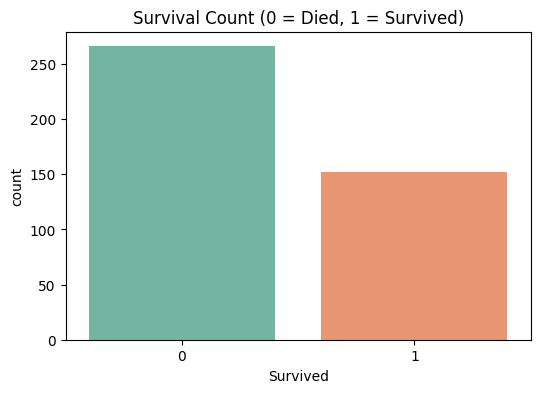

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", data=df, palette="Set2")
plt.title("Survival Count (0 = Died, 1 = Survived)")
plt.show()

/tmp/ipython-input-3212312648.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Survived", data=df, palette="Set2")


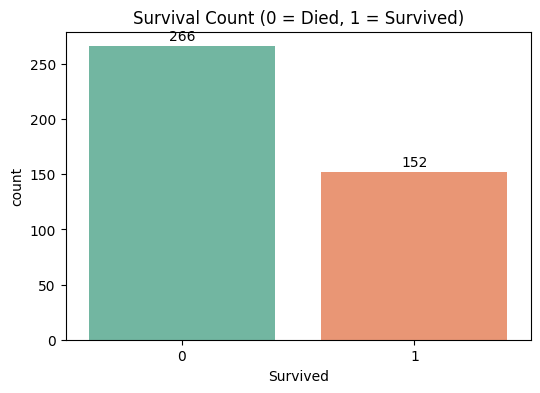

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
ax = sns.countplot(x="Survived", data=df, palette="Set2")

# Add numbers on top of each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height() + 5,
            int(p.get_height()), ha='center')

plt.title("Survival Count (0 = Died, 1 = Survived)")
plt.show()


for p in ax.patches:

ax is your Matplotlib axis object. It contains all the elements (like bars, lines, etc.) of your plot.

ax.patches is a list of all the "patches" (bars, in this case) in your plot. So, this loop is iterating through each bar in the plot.

p.get_x() + p.get_width()/2

p.get_x() gives the x-coordinate of the left edge of the bar.

p.get_width() gives the width of the bar.

By adding p.get_width()/2, you're getting the x-coordinate for the center of the bar. This is where you want to place the text horizontally.

p.get_height() + 5

p.get_height() gives the height of the bar. In a bar chart, the height often represents a value (like the count or frequency).

Adding 5 offsets the text a bit above the top of the bar. This is to prevent the text from overlapping the top edge of the bar.

int(p.get_height())

This converts the height of the bar (which is likely a float) to an integer, so you can display it as a whole number in the annotation.

ha='center'

This stands for "horizontal alignment." It ensures that the text is centered horizontally at the specified x-coordinate, making it neatly aligned with the middle of the bar.

plt.title("Survival Count (0 = Died, 1 = Survived)")

This sets the title of the plot, explaining what the bars represent. In this case, you're likely visualizing a survival count where 0 means "died" and 1 means "survived."

plt.show()

This displays the plot. After all the plotting and annotation, plt.show() makes the plot visible.

## **2. Survival by Gender**

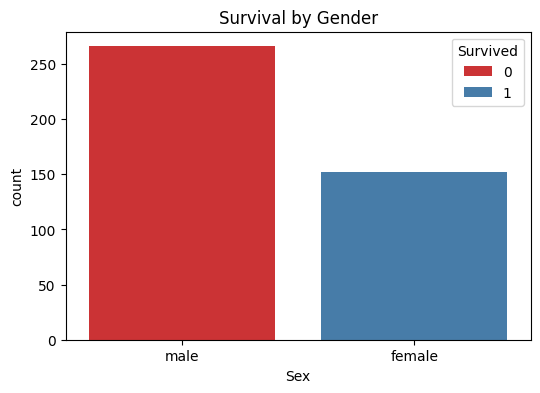

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="Sex", hue="Survived", data=df, palette="Set1")
plt.title("Survival by Gender")
plt.show()

## **3. Age distribution**

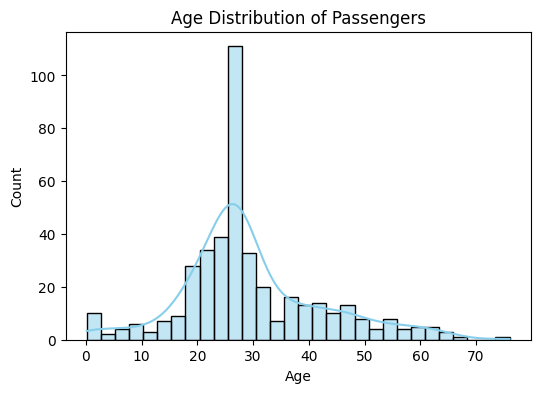

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df["Age"].dropna(), bins=30, kde=True, color="skyblue")
plt.title("Age Distribution of Passengers")
plt.show()

# **4. Boxplot: Age vs Pclass**

/tmp/ipython-input-382090662.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Pclass", y="Age", data=df, palette="Pastel1")


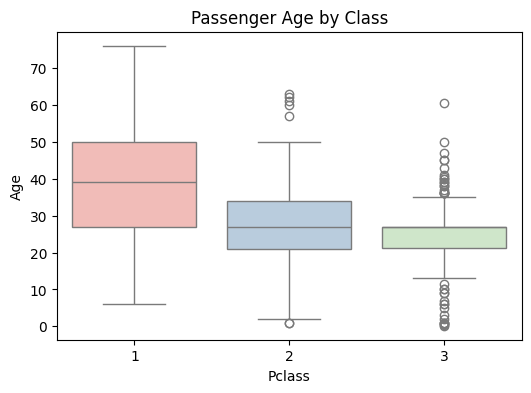

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Pclass", y="Age", data=df, palette="Pastel1")
plt.title("Passenger Age by Class")
plt.show()

# **5. Heatmap of correlations**

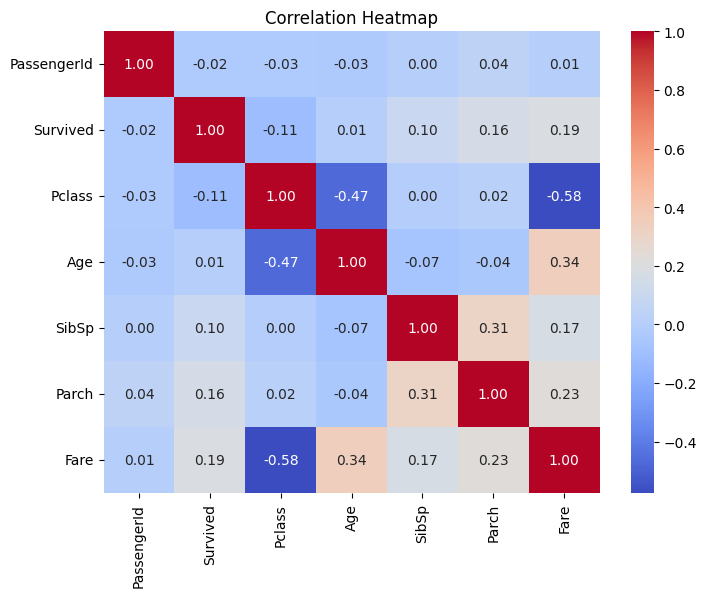

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])


In [ ]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


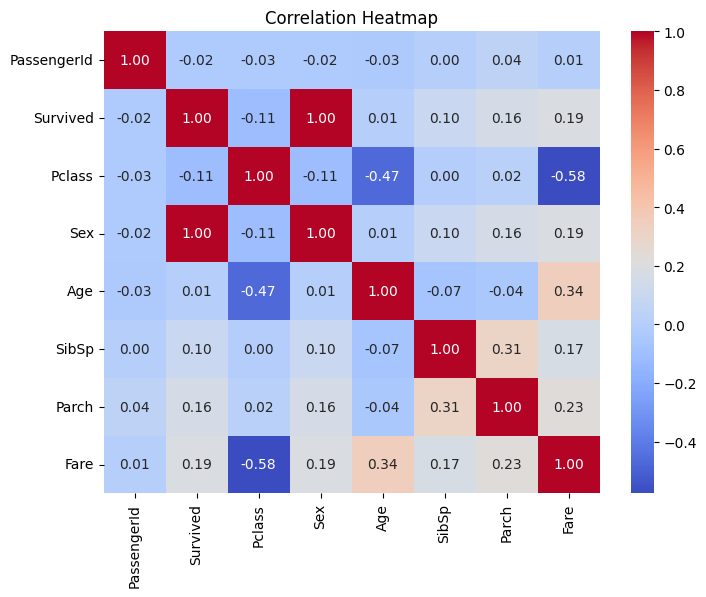

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Correlation measures whether as one variable increases, the other increases (+) or decreases (–).

If Sex increases (from 0 → 1, i.e., male → female),

Survived decreases (from 1 → 0, meaning survival rate drops).

That’s why you see a negative correlation.

In [ ]:
df.groupby("Sex")["Survived"].mean()


,Survived
Sex,
0,0.0
1,1.0


## **6. Pairplot (quick overview)**

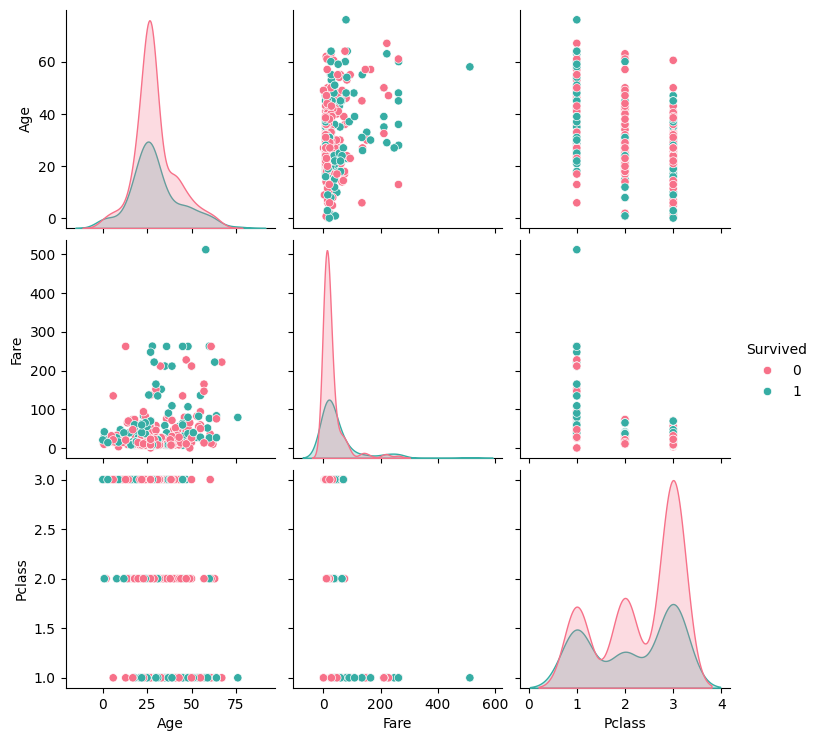

In [ ]:
sns.pairplot(df[["Survived", "Age", "Fare", "Pclass"]], hue="Survived", palette="husl")
plt.show()